In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Analyze Metadata Table

In [3]:
metadata_df = pd.read_csv('metadata_table.csv', header=0)

In [4]:
# Number of Total Files in OAS
len(metadata_df)

15846

In [5]:
metadata_df = metadata_df.fillna("None")
metadata_df.head()

,Run,Link,Author,Species,Age,BSource,BType,Vaccine,Disease,Subject,Longitudinal,Unique sequences,Total sequences,Isotype,Chain,metadata_id
0,SRR1537522,https://doi.org/10.1126/scitranslmed.3008879,"Stern et al., 2014",human,39.0,Cervical-Lymph-Node,Unsorted-B-Cells,None,MS,Subject-M1,no,66,70.0,Bulk,Light,10d515b3-d196-4fd2-bf3a-8356ace5cce1
1,SRR1537526,https://doi.org/10.1126/scitranslmed.3008879,"Stern et al., 2014",human,39.0,Brain-Lesion,Unsorted-B-Cells,None,MS,Subject-M1,no,34,42.0,Bulk,Light,724c6f2f-eb50-4a17-a91b-a30f415f3d19
2,SRR1537525,https://doi.org/10.1126/scitranslmed.3008879,"Stern et al., 2014",human,39.0,Cortex,Unsorted-B-Cells,None,MS,Subject-M1,no,16,39.0,Bulk,Light,a14a4bb2-6a5e-4f77-995b-a4ec7fe1f716
3,SRR1537523,https://doi.org/10.1126/scitranslmed.3008879,"Stern et al., 2014",human,39.0,Spleen,Unsorted-B-Cells,None,MS,Subject-M1,no,54,57.0,Bulk,Light,06df89fc-8487-4d2e-90c1-e2ec80bdb00c
4,SRR1537524,https://doi.org/10.1126/scitranslmed.3008879,"Stern et al., 2014",human,39.0,Choroid-Plexus,Unsorted-B-Cells,None,MS,Subject-M1,no,37,55.0,Bulk,Light,72bf08cf-c0e6-417e-b88c-b087fb0e007e


### Runs 

In [6]:
def find_differing_columns(dataframe, group_by_column):
    """
    Identifies columns that differ between rows with the same value in a specified column.

    Parameters:
        dataframe (pd.DataFrame): The DataFrame to analyze.
        group_by_column (str): The column name to group by.

    Returns:
        dict: A dictionary where keys are group values and values are lists of differing columns.
    """
    differing_columns = {}
    
    # Group by the specified column
    grouped = dataframe.groupby(group_by_column)
    
    for group, rows in grouped:
        if len(rows) > 1:  # Check only groups with more than one row
            # Compare rows to find differing columns
            diff_cols = rows.nunique()[rows.nunique() > 1].index.tolist()
            differing_columns[group] = diff_cols
    
    return differing_columns

differing_columns = find_differing_columns(metadata_df, "Run")


In [7]:
metadata_df[metadata_df["Run"] == '1279049']

,Run,Link,Author,Species,Age,BSource,BType,Vaccine,Disease,Subject,Longitudinal,Unique sequences,Total sequences,Isotype,Chain,metadata_id
11806,1279049,https://doi.org/10.1038/s41586-022-05371-z,"Jaffe et al., 2022",human,35.0,PBMC,Naive-B-Cells,None,SARS-COV-2,Donor-2,no,2,2.0,Bulk,Heavy,f90291d9-5c33-4596-9d54-ba6eb55e677c
11807,1279049,https://doi.org/10.1038/s41586-022-05371-z,"Jaffe et al., 2022",human,35.0,PBMC,Naive-B-Cells,None,SARS-COV-2,Donor-2,no,282,282.0,IGHD,Heavy,e3f5e506-f0ba-41fb-be1b-5bf2a721a983
11808,1279049,https://doi.org/10.1038/s41586-022-05371-z,"Jaffe et al., 2022",human,35.0,PBMC,Naive-B-Cells,None,SARS-COV-2,Donor-2,no,9751,9773.0,IGHM,Heavy,42182110-3557-4d68-b150-d9bce6ef2cf6
11809,1279049,https://doi.org/10.1038/s41586-022-05371-z,"Jaffe et al., 2022",human,35.0,PBMC,Naive-B-Cells,None,SARS-COV-2,Donor-2,no,1,1.0,IGHG,Heavy,8e4ff3d0-7016-4233-acb4-e23c67e57a82
11951,1279049,https://doi.org/10.1038/s41586-022-05371-z,"Jaffe et al., 2022",human,35.0,PBMC,Naive-B-Cells,None,SARS-COV-2,Donor-2,no,8954,None,All,Paired,0616212a-9627-4f0c-9e31-4ffad300a351
11973,1279049,https://doi.org/10.1038/s41586-022-05371-z,"Jaffe et al., 2022",human,35.0,PBMC,Naive-B-Cells,None,SARS-COV-2,Donor-2,no,4098,10433.0,Bulk,Light,81e49add-704e-4176-aa7c-17ad75401608


In [8]:
differing_columns

{'1279049': ['Unique sequences',
  'Total sequences',
  'Isotype',
  'Chain',
  'metadata_id'],
 '1279050': ['Unique sequences',
  'Total sequences',
  'Isotype',
  'Chain',
  'metadata_id'],
 '1279051': ['Unique sequences',
  'Total sequences',
  'Isotype',
  'Chain',
  'metadata_id'],
 '1279052': ['Unique sequences',
  'Total sequences',
  'Isotype',
  'Chain',
  'metadata_id'],
 '1279053': ['Unique sequences',
  'Total sequences',
  'Isotype',
  'Chain',
  'metadata_id'],
 '1279054': ['Unique sequences',
  'Total sequences',
  'Isotype',
  'Chain',
  'metadata_id'],
 '1279055': ['Unique sequences',
  'Total sequences',
  'Isotype',
  'Chain',
  'metadata_id'],
 '1279057': ['Unique sequences',
  'Total sequences',
  'Isotype',
  'Chain',
  'metadata_id'],
 '1279058': ['Unique sequences',
  'Total sequences',
  'Isotype',
  'Chain',
  'metadata_id'],
 '1279059': ['Unique sequences',
  'Total sequences',
  'Isotype',
  'Chain',
  'metadata_id'],
 '1279060': ['Unique sequences',
  'Tota

In [9]:
# Number of Unique Runs in OAS 
len(metadata_df["Run"].unique())

4266

### Longitudinal Data

In [108]:
# Runs with Longitudinal Data (time course)
grouped = metadata_df.groupby("Run")
runs_with_no_longitudinal = grouped.filter(lambda group: (group['Longitudinal'] == 'no').all())
runs_with_no_longitudinal.head()

,Run,Link,Author,Species,Age,BSource,BType,Vaccine,Disease,Subject,Longitudinal,Unique sequences,Total sequences,Isotype,Chain,metadata_id
0,SRR1537522,https://doi.org/10.1126/scitranslmed.3008879,"Stern et al., 2014",human,39.0,Cervical-Lymph-Node,Unsorted-B-Cells,None,MS,Subject-M1,no,66,70.0,Bulk,Light,10d515b3-d196-4fd2-bf3a-8356ace5cce1
1,SRR1537526,https://doi.org/10.1126/scitranslmed.3008879,"Stern et al., 2014",human,39.0,Brain-Lesion,Unsorted-B-Cells,None,MS,Subject-M1,no,34,42.0,Bulk,Light,724c6f2f-eb50-4a17-a91b-a30f415f3d19
2,SRR1537525,https://doi.org/10.1126/scitranslmed.3008879,"Stern et al., 2014",human,39.0,Cortex,Unsorted-B-Cells,None,MS,Subject-M1,no,16,39.0,Bulk,Light,a14a4bb2-6a5e-4f77-995b-a4ec7fe1f716
3,SRR1537523,https://doi.org/10.1126/scitranslmed.3008879,"Stern et al., 2014",human,39.0,Spleen,Unsorted-B-Cells,None,MS,Subject-M1,no,54,57.0,Bulk,Light,06df89fc-8487-4d2e-90c1-e2ec80bdb00c
4,SRR1537524,https://doi.org/10.1126/scitranslmed.3008879,"Stern et al., 2014",human,39.0,Choroid-Plexus,Unsorted-B-Cells,None,MS,Subject-M1,no,37,55.0,Bulk,Light,72bf08cf-c0e6-417e-b88c-b087fb0e007e


In [109]:
# Number of runs without time course data
num_runs_no_longitudinal = runs_with_no_longitudinal['Run'].nunique()
num_runs_no_longitudinal

2963

In [110]:
4266 - 2963

1303

In [111]:
metadata_df['Longitudinal'].unique()

array(['no', 'Week-6', 'Week-7', 'Week-8', 'Week-12', 'Week-14',
       'Week-22', 'Week-30', 'Week-41', 'Week-53', 'Week-66', 'Week-100',
       'Week-152', 'Week-264', 'Week-323', 'Week-9', 'Week-20', 'Year-17',
       'Year-23', 'Post-Infection-3-Years', 'Post-Infection-6-Months',
       'Week-48', 'Week-38', 'Week-119', 'Week-206', 'Week-59', 'Month-6',
       'Week-181', 'Week-94', 'Week-213', 'Day-0', 'Day-7', 'Day-14',
       'Day-28', 'Day-90', 'Visit-1', 'Visit-2', 'Visit-4', 'Visit-5',
       'Day-In-Space-64', 'Day-Before-Space-25', 'Month-8', 'Month-0',
       'Day-After-Space-30', 'Day-After-Space-7', 'Day-After-Space-1',
       'Day-In-Space-129', 'Before-Hour-1', 'After-Week-4',
       'After-Week-2', 'After-Week-1', 'Before-Day-8', 'Before-Day-2',
       'After-Day-3', 'After-Hour-1', 'After-Day-1', 'After-Week-3',
       'Week-92', 'Week-144', 'Day-35', 'Day-56/168', 'Day-63/175',
       'Day-96/208', 'None', 'Pre-Infection', 'Year-2010', 'Year-2020',
       'Year-2014

### Studies and Subjects

In [ ]:
# Number of unique studies 

num_studies = metadata_df['Link'].nunique()
num_studies

95

In [10]:
unique_subjects = metadata_df.groupby('Link')['Subject'].nunique()
unique_subjects

Link
 https://doi.org/10.1371/journal.pone.0235713           21
 https://doi.org/10.1371/journal.ppat.1006469            1
http://www.genome.org​/cgi/doi/10.1101/gr.154815.113    21
https://doi.org/10.1016/j.cell.2015.03.004               1
https://doi.org/10.1016/j.cell.2015.05.007               4
                                                        ..
https://dx.doi.org/10.1371%2Fjournal.pone.0096727        1
https://dx.doi.org/10.3389%2Ffimmu.2020.01734           31
https://dx.doi.org/10.3389%2Ffmicb.2012.00315            1
https://pubmed.ncbi.nlm.nih.gov/32066951/                2
https://pubmed.ncbi.nlm.nih.gov/32859762/                1
Name: Subject, Length: 95, dtype: int64

In [126]:
num_unique_subjects = sum(unique_subjects)
num_unique_subjects

937

As of time of download, OAS has a total of 15846 *files*, which are organized into 4266 *runs*.

There can be multiple files with the same "Run" ID, and this is because that original Run is split up into multiple Isotypes (IgG, IgM, Bulk, etc) and Chains (Heavy, Light, Paired).

There can also be multiple "Runs" associated with a study, as these may be BSeq runs sourced from different tissues (BSource) or from different timepoints.

2963/4266 don't have time course data, 1303/4266 contain time course data.

There are a total of 95 studies (publications), of which the 4266 runs are distributed. There are 937 unique subjects across these 95 studies.

# Plotting Distributions

In [12]:
sequence_sums = metadata_df.groupby("Link")['Unique sequences'].sum()
sequence_sums

Link
 https://doi.org/10.1371/journal.pone.0235713           2919022
 https://doi.org/10.1371/journal.ppat.1006469            160348
http://www.genome.org​/cgi/doi/10.1101/gr.154815.113     258244
https://doi.org/10.1016/j.cell.2015.03.004              2234305
https://doi.org/10.1016/j.cell.2015.05.007               383173
                                                         ...   
https://dx.doi.org/10.1371%2Fjournal.pone.0096727       8250994
https://dx.doi.org/10.3389%2Ffimmu.2020.01734           8273722
https://dx.doi.org/10.3389%2Ffmicb.2012.00315            315095
https://pubmed.ncbi.nlm.nih.gov/32066951/                 12103
https://pubmed.ncbi.nlm.nih.gov/32859762/                179468
Name: Unique sequences, Length: 95, dtype: int64

In [174]:
def generate_pie_chart_by_file(dataframe, column_name, max_labels=5):
    """
    Generates a pie chart showing the proportion of unique files (by metadata_id)
    corresponding to the top `max_labels` values in a specified column. Groups remaining
    values into 'Other'.
    
    Parameters:
        dataframe (pd.DataFrame): The DataFrame containing the data.
        column_name (str): The name of the column to analyze.
        max_labels (int): The maximum number of labels to display. Remaining are grouped as 'Other'.
    
    Returns:
        None: Displays a pie chart.
    """
    # Filter the table by the given column and count unique files by metadata_id
    filtered_df = dataframe[[column_name, 'metadata_id']].drop_duplicates()
    value_counts = filtered_df[column_name].value_counts()
    value_counts.sort_values(ascending=False, inplace=True)

    unique_column_values = len(value_counts)
    
    # Group values outside the top `max_labels` as 'Other'
    if unique_column_values > max_labels:
        top_values = value_counts.iloc[:max_labels]
        other_count = value_counts.iloc[max_labels:].sum()
        top_values['Other'] = other_count
        value_counts = top_values
    
    # Plot the pie chart
    plt.figure(figsize=(8, 8))
    value_counts.plot.pie(autopct='%1.1f%%', startangle=90, cmap='tab20')
    plt.title(f"Proportion of OAS Data Files by {column_name} \n Total {column_name}s: {unique_column_values}")
    plt.ylabel("")  # Removes the default ylabel
    plt.show()

def generate_pie_chart_by_sequences(dataframe, column_name, max_labels=5):
    """
    Generates a pie chart showing the proportion of sequences (by 'Unique sequences')
    corresponding to the top `max_labels` values in a specified column. Groups remaining
    values into 'Other'.

    Parameters:
        dataframe (pd.DataFrame): The DataFrame containing the data.
        column_name (str): The name of the column to analyze.
        max_labels (int): The maximum number of labels to display. Remaining are grouped as 'Other'.

    Returns:
        None: Displays a pie chart.
    """
    # Calculate the total sequences for each unique value in the specified column
    sequence_sums = dataframe.groupby(column_name)['Unique sequences'].sum()
    sequence_sums.sort_values(ascending=False, inplace=True)
    unique_column_values = len(sequence_sums)

    # Group values outside the top `max_labels` as 'Other'
    if unique_column_values > max_labels:
        top_values = sequence_sums.iloc[:max_labels]
        other_sum = sequence_sums.iloc[max_labels:].sum()
        top_values['Other'] = other_sum
        sequence_sums = top_values

    # Plot the pie chart
    plt.figure(figsize=(8, 8))
    sequence_sums.plot.pie(autopct='%1.1f%%', startangle=90, cmap='tab20')
    plt.title(f"Proportion of OAS Sequences by {column_name} \n Total {column_name}s: {unique_column_values}")
    plt.ylabel("")  # Removes the default ylabel
    plt.show()

def generate_bar_plot_by_file(dataframe, column_name, max_labels=10):
    """
    Generates a bar plot showing the proportion of unique files (by metadata_id)
    corresponding to the top `max_labels` values in a specified column. Groups remaining
    values into 'Other'.

    Parameters:
        dataframe (pd.DataFrame): The DataFrame containing the data.
        column_name (str): The name of the column to analyze.
        max_labels (int): The maximum number of labels to display. Remaining are grouped as 'Other'.

    Returns:
        None: Displays a bar plot.
    """
    # Filter the table by the given column and count unique files by metadata_id
    filtered_df = dataframe[[column_name, 'metadata_id']].drop_duplicates()
    value_counts = filtered_df[column_name].value_counts()
    value_counts.sort_values(ascending=False, inplace=True)

    unique_column_values = len(value_counts)
    
    # Group values outside the top `max_labels` as 'Other'
    if unique_column_values > max_labels:
        top_values = value_counts.iloc[:max_labels]
        other_count = value_counts.iloc[max_labels:].sum()
        top_values['Other'] = other_count
        value_counts = top_values

    # Plot the bar plot
    plt.figure(figsize=(12, 6))
    value_counts.plot.bar()
    plt.title(f"Proportion of OAS Data Files by {column_name} \n Total {column_name}s: {unique_column_values}")
    plt.xlabel(column_name)
    plt.ylabel("Number of Files")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

def generate_bar_plot_by_sequences(dataframe, column_name, max_labels=10):
    """
    Generates a bar plot showing the proportion of sequences (by 'Unique sequences')
    corresponding to the top `max_labels` values in a specified column. Groups remaining
    values into 'Other'.

    Parameters:
        dataframe (pd.DataFrame): The DataFrame containing the data.
        column_name (str): The name of the column to analyze.
        max_labels (int): The maximum number of labels to display. Remaining are grouped as 'Other'.

    Returns:
        None: Displays a bar plot.
    """
    # Calculate the total sequences for each unique value in the specified column
    sequence_sums = dataframe.groupby(column_name)['Unique sequences'].sum()
    sequence_sums.sort_values(ascending=False, inplace=True)
    unique_column_values = len(sequence_sums)

    # Group values outside the top `max_labels` as 'Other'
    if unique_column_values > max_labels:
        top_values = sequence_sums.iloc[:max_labels]
        other_sum = sequence_sums.iloc[max_labels:].sum()
        top_values['Other'] = other_sum
        sequence_sums = top_values

    # Plot the bar plot
    plt.figure(figsize=(12, 6))
    sequence_sums.plot.bar()
    plt.title(f"Proportion of OAS Sequences by {column_name} \n Total {column_name}s: {unique_column_values}")
    plt.xlabel(column_name)
    plt.ylabel("Number of Sequences")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


### Debugging

In [ ]:
sequence_sums = metadata_df.groupby("Disease")['Unique sequences'].sum()
sequence_sums

Disease
AChR-MG                                   1801276
Allergic-Rhinitis-In-Season                 12187
Allergic-Rhinitis-Out-Of-Season              7467
Allergy/NoSIT                            13318676
Allergy/SIT                                411853
Asthma                                    3101228
CLL                                         15447
CMV                                       1144657
CMV/EBV                                  21799210
Dengue                                     296513
EBV                                       2872669
Ebola                                    11903910
HCV                                       1067540
HIV                                      79836494
Healthy/celiac-disease                   26365506
Light-Chain-Amyloidosis                   2919022
MS                                       10433805
MuSK-MG                                   2144141
Multiple-sclerosis                         179468
Non-Dengue-Febrile-Illness                

In [ ]:
total_seqs = sequence_sums.sum()
total_seqs
# 2429623319

np.int64(2429623319)

In [ ]:
unique_column_values = len(sequence_sums)
unique_column_values

27

In [ ]:
top_values = sequence_sums.nlargest(10)
top_values

Disease
None                      2120304814
SARS-COV-2                 105646579
HIV                         79836494
Healthy/celiac-disease      26365506
CMV/EBV                     21799210
Allergy/NoSIT               13318676
Ebola                       11903910
MS                          10433805
SLE                          9118157
Tonsillitis                  6418861
Name: Unique sequences, dtype: int64

In [ ]:
other_sum = sequence_sums.iloc[10:].sum()
other_sum

np.int64(2387714805)

In [ ]:
top_values.sum() + other_sum

np.int64(4792860817)

In [ ]:
top_values['Other'] = other_sum
sequence_sums = top_values

### Author

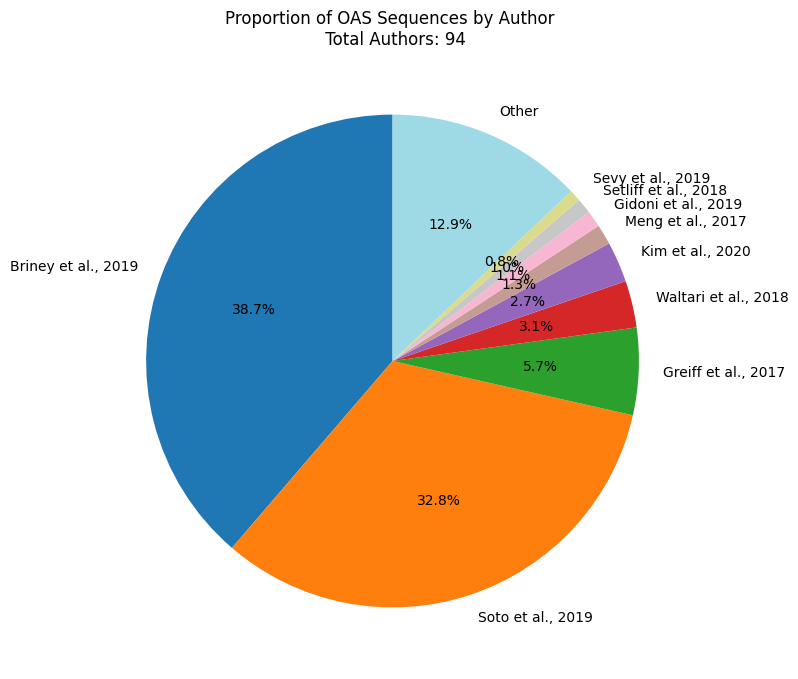

In [175]:
generate_pie_chart_by_sequences(metadata_df, 'Author', max_labels=9)

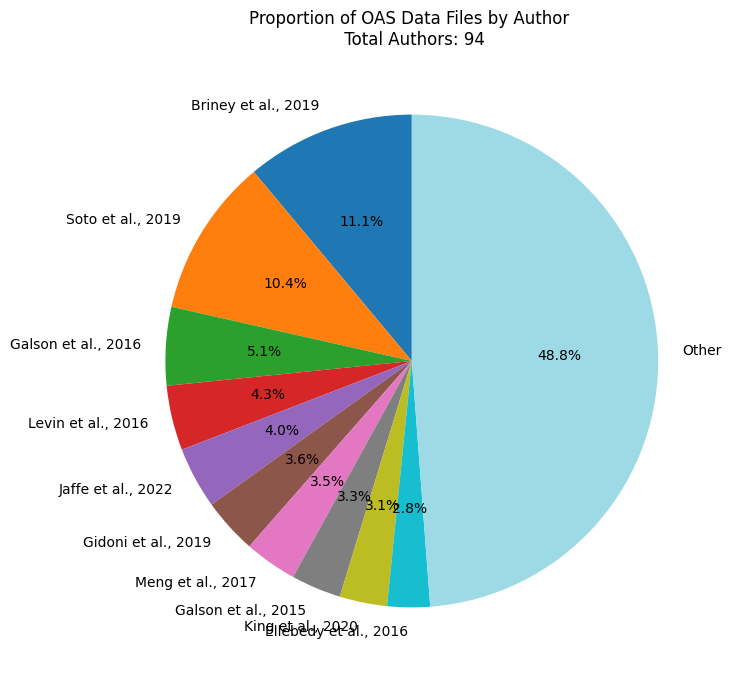

In [176]:
generate_pie_chart_by_file(metadata_df, 'Author', max_labels=10)

### Disease

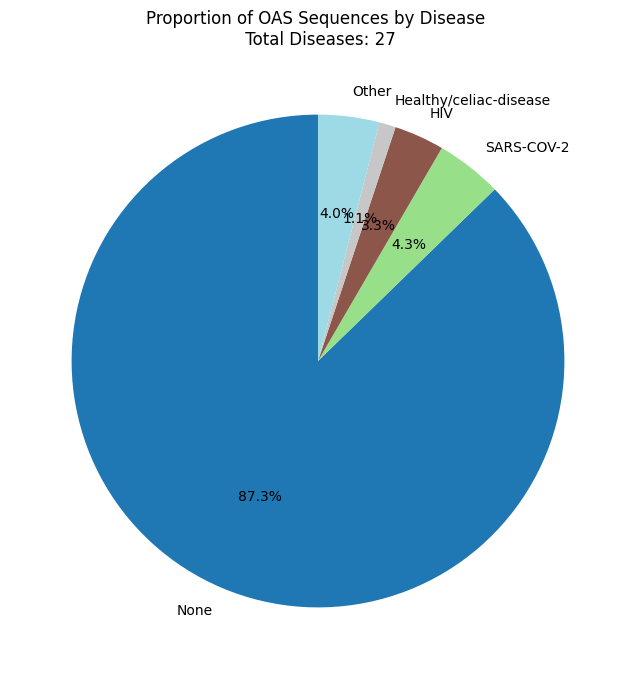

In [177]:
generate_pie_chart_by_sequences(metadata_df, 'Disease', 4)

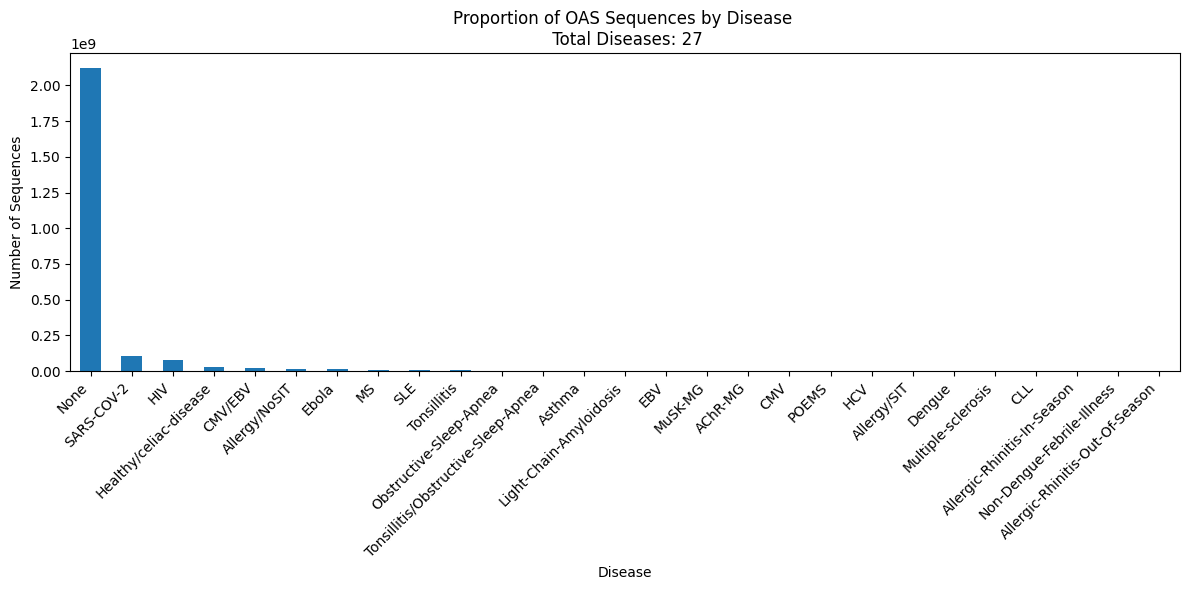

In [178]:
generate_bar_plot_by_sequences(metadata_df, 'Disease', 27)

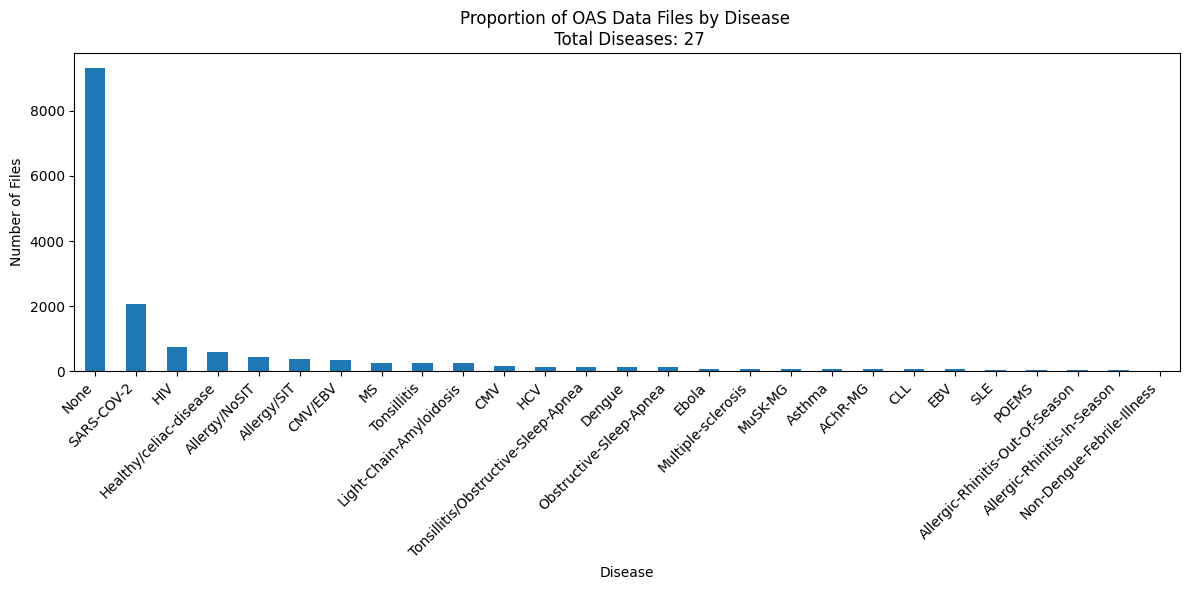

In [179]:
generate_bar_plot_by_file(metadata_df, 'Disease', 27)

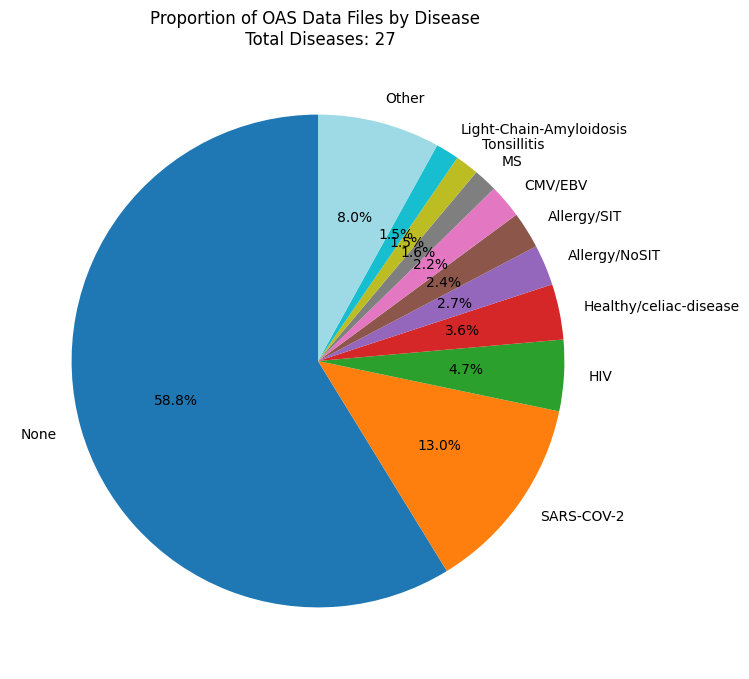

In [180]:
generate_pie_chart_by_file(metadata_df, 'Disease', 10)

## Vaccine

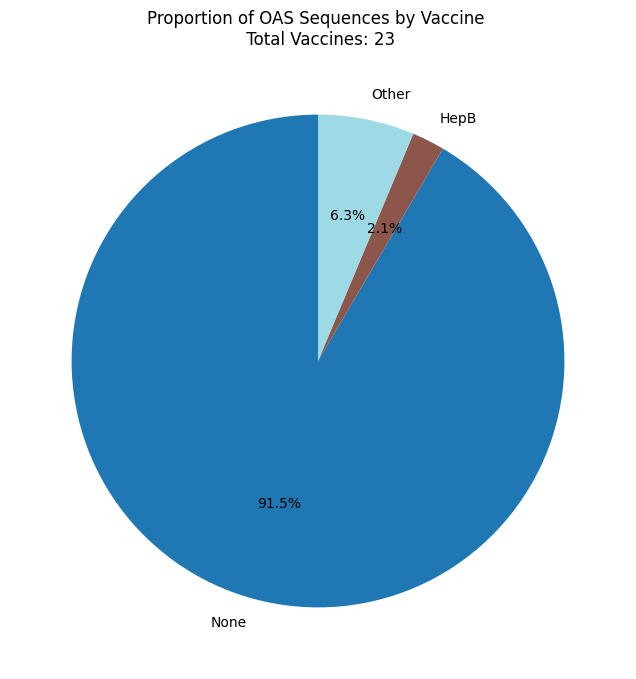

In [181]:
generate_pie_chart_by_sequences(metadata_df, 'Vaccine', 2)

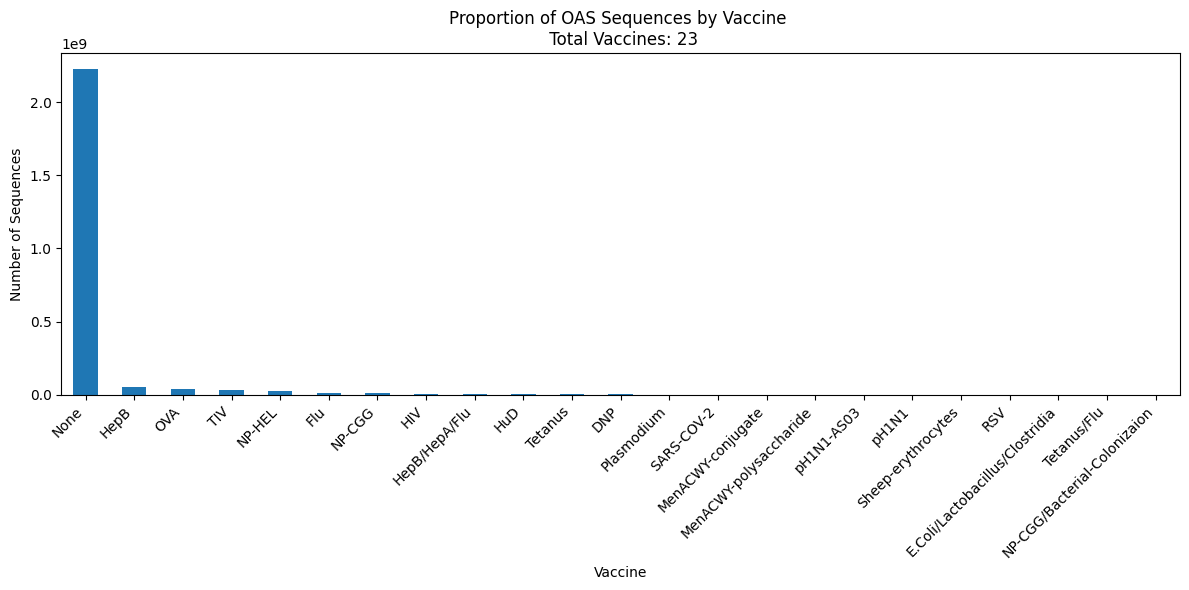

In [182]:
generate_bar_plot_by_sequences(metadata_df, 'Vaccine', 23)

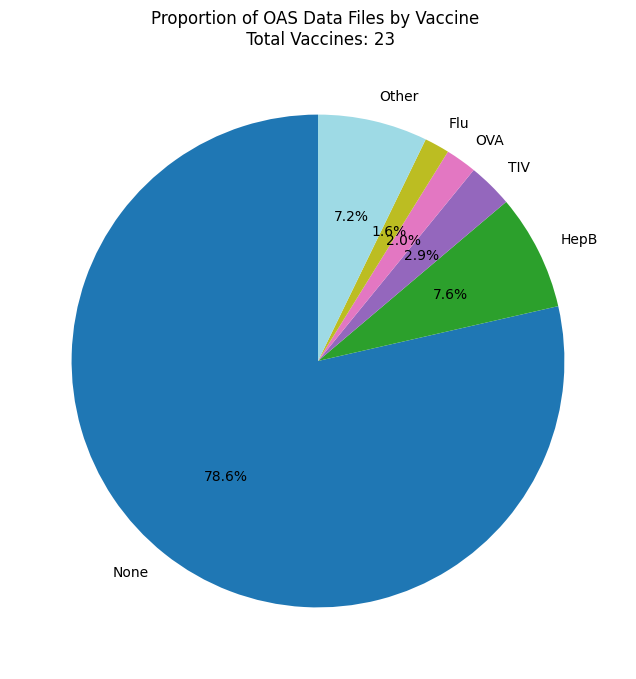

In [183]:
generate_pie_chart_by_file(metadata_df, 'Vaccine', 5)

## BSource

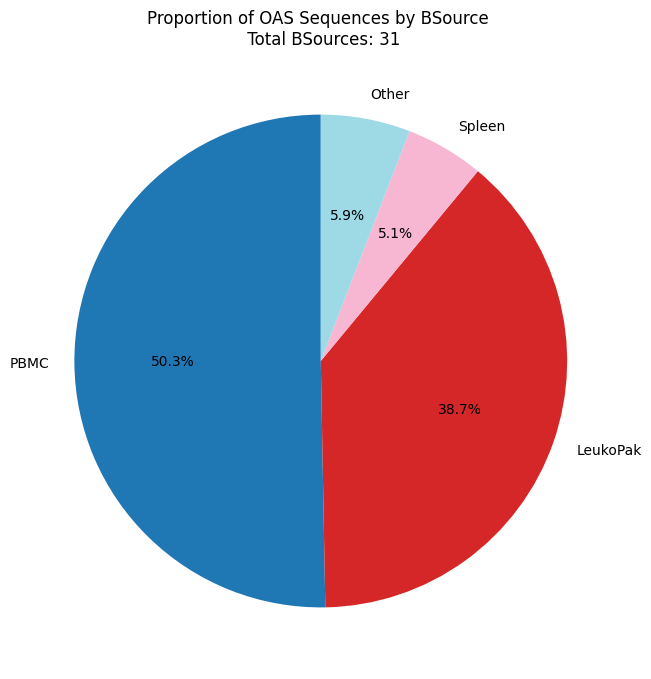

In [184]:
generate_pie_chart_by_sequences(metadata_df, 'BSource', 3)

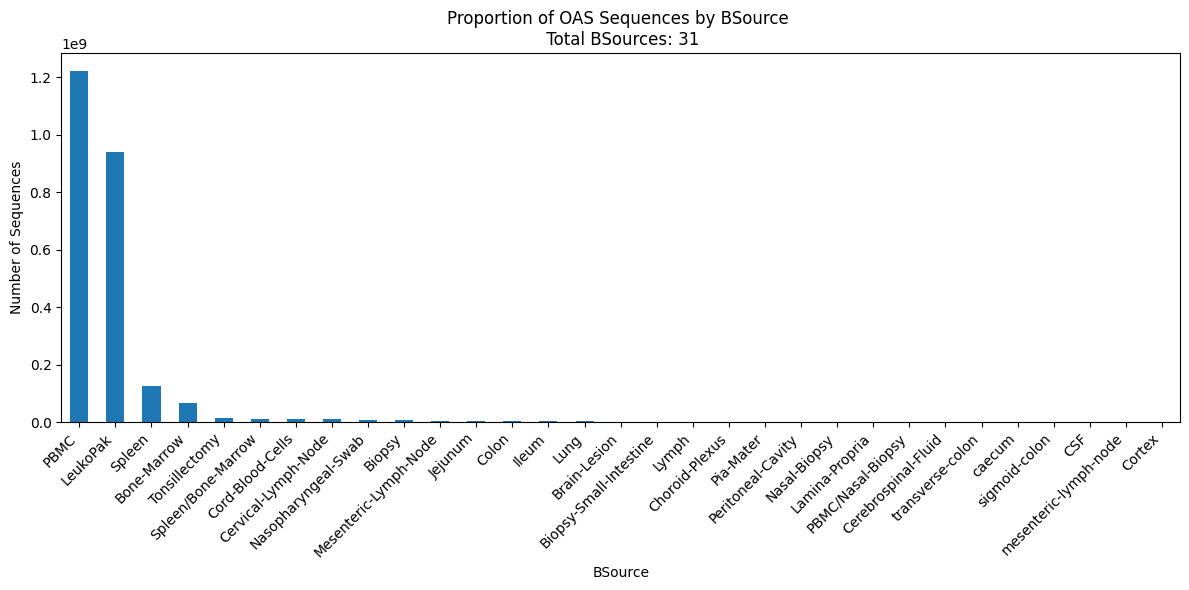

In [185]:
generate_bar_plot_by_sequences(metadata_df, 'BSource', 31)

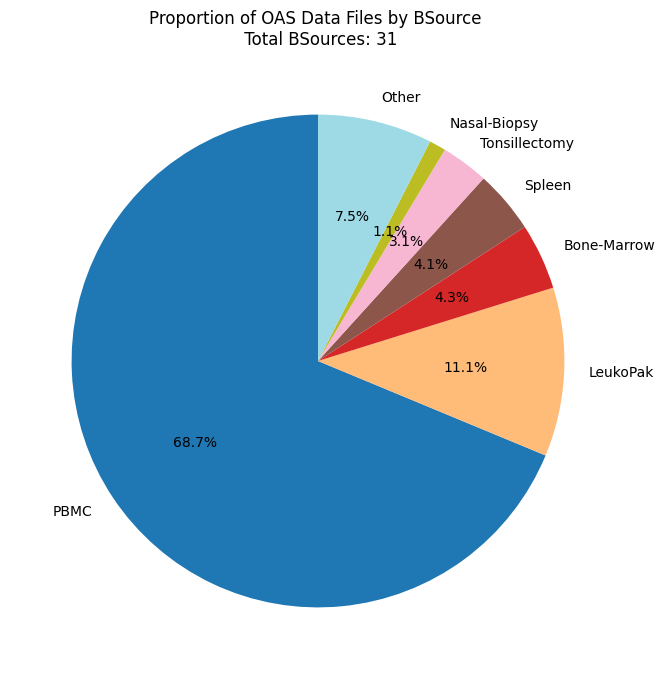

In [186]:
generate_pie_chart_by_file(metadata_df, 'BSource', 6)

## Isotype

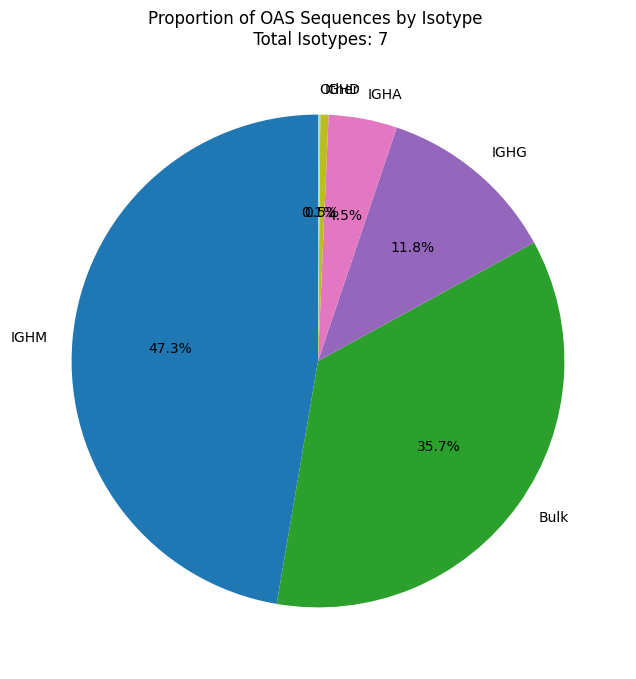

In [187]:
generate_pie_chart_by_sequences(metadata_df, 'Isotype', 5)

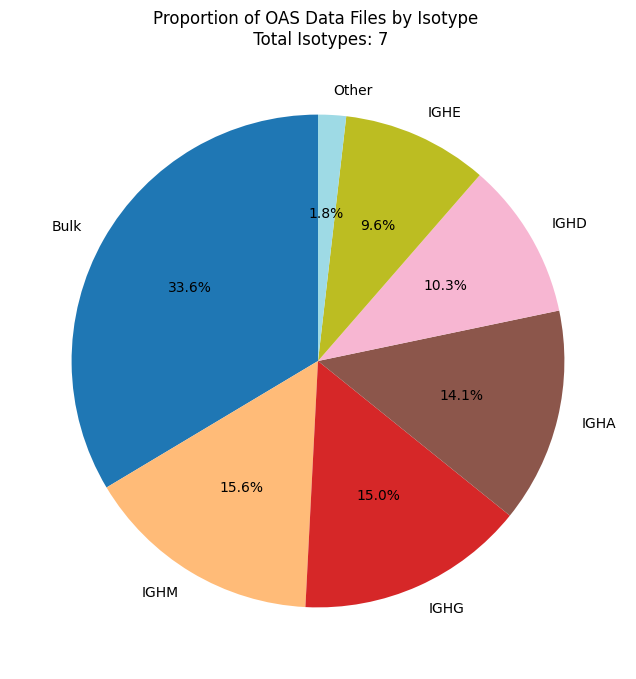

In [188]:
generate_pie_chart_by_file(metadata_df, 'Isotype', 6)

## Sequence Distribution by Run

In [193]:
sequences_per_run = metadata_df.groupby('Run')['Unique sequences'].sum()
sequences_per_run

Run
1279049             23088
1279050             48189
1279051             36236
1279052              3561
1279053             28999
                   ...   
schanz_2014_06     219807
schanz_2014_07    1284328
schanz_2014_08     865121
schanz_2014_09     703535
schanz_2014_10     467469
Name: Unique sequences, Length: 4266, dtype: int64

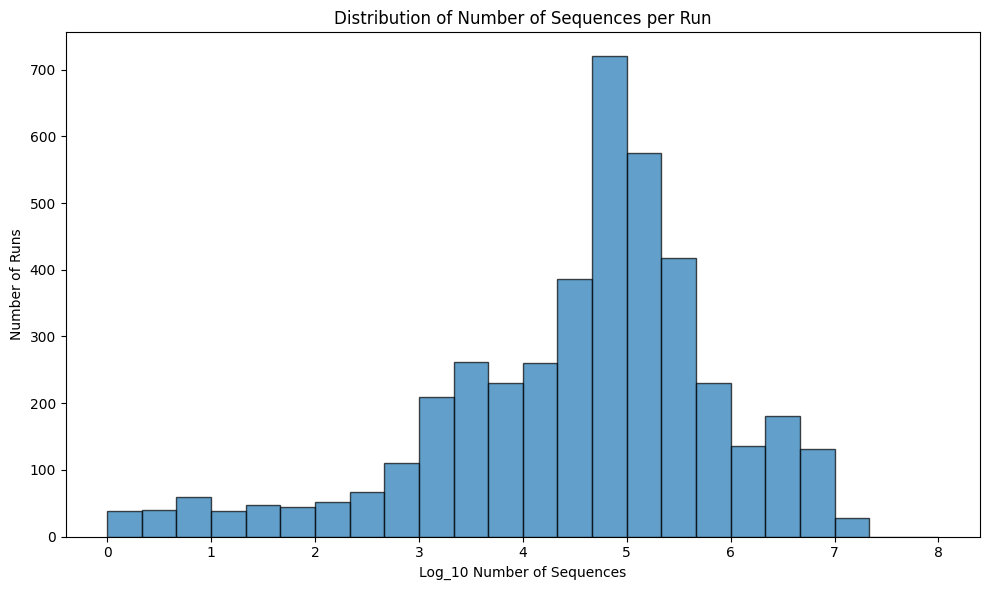

In [221]:
def plot_sequence_distribution_by_run(dataframe):
    """
    Plots the distribution of the number of sequences (from 'Unique sequences') per 'Run'.

    Parameters:
        dataframe (pd.DataFrame): The DataFrame containing the data.

    Returns:
        None: Displays the plot.
    """
    # Sum the sequences grouped by 'Run'
    sequences_per_run = np.log10(dataframe.groupby('Run')['Unique sequences'].sum())

    # Plot the distribution
    plt.figure(figsize=(10, 6))
    plt.hist(sequences_per_run, bins=24, range=(0,8), edgecolor='black', alpha=0.7)
    plt.title("Distribution of Number of Sequences per Run")
    plt.xlabel("Log_10 Number of Sequences")
    plt.ylabel("Number of Runs")
    plt.tight_layout()
    plt.show()

# Example usage
plot_sequence_distribution_by_run(metadata_df)

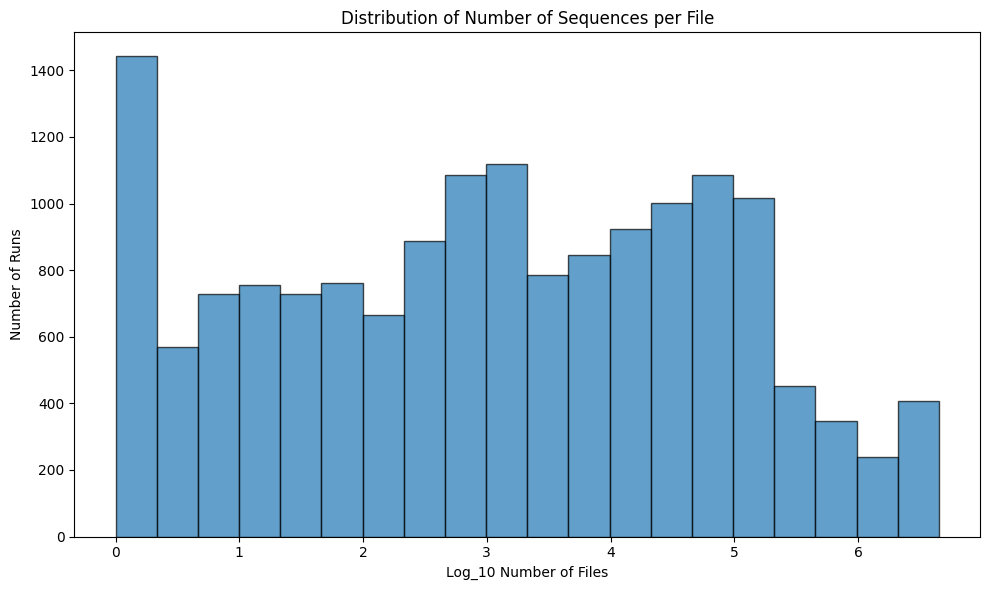

In [213]:
def plot_sequence_distribution_by_file(dataframe):
    """
    Plots the distribution of the number of sequences (from 'Unique sequences') per 'Run'.

    Parameters:
        dataframe (pd.DataFrame): The DataFrame containing the data.

    Returns:
        None: Displays the plot.
    """
    # Sum the sequences grouped by 'Run'
    sequences_per_run = np.log10(dataframe['Unique sequences'])

    # Plot the distribution
    plt.figure(figsize=(10, 6))
    plt.hist(sequences_per_run, bins=20, edgecolor='black', alpha=0.7)
    plt.title("Distribution of Number of Sequences per File")
    plt.xlabel("Log_10 Number of Files")
    plt.ylabel("Number of Runs")
    plt.tight_layout()
    plt.show()

# Example usage
plot_sequence_distribution_by_file(metadata_df)